Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [84]:
#age age in years
#sex
#bmi body mass index
#bp average blood pressure
#s1 tc, T-Cells (a type of white blood cells)
#s2 ldl, low-density lipoproteins
#s3 hdl, high-density lipoproteins
#s4 tch, thyroid stimulating hormone
#s5 ltg, lamotrigine
#s6 glu, blood sugar level
#disease progression

Import libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
print(sklearn.__version__)

0.24.1


Load file

In [86]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

In [87]:
X.shape

(442, 10)

In [88]:
y.shape

(442,)

In [89]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [90]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Create dataframe

In [91]:
df1 = pd.DataFrame(X, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
print(df1)

          age       sex       bmi  ...       tch       ltg       glu
0    0.038076  0.050680  0.061696  ... -0.002592  0.019908 -0.017646
1   -0.001882 -0.044642 -0.051474  ... -0.039493 -0.068330 -0.092204
2    0.085299  0.050680  0.044451  ... -0.002592  0.002864 -0.025930
3   -0.089063 -0.044642 -0.011595  ...  0.034309  0.022692 -0.009362
4    0.005383 -0.044642 -0.036385  ... -0.002592 -0.031991 -0.046641
..        ...       ...       ...  ...       ...       ...       ...
437  0.041708  0.050680  0.019662  ... -0.002592  0.031193  0.007207
438 -0.005515  0.050680 -0.015906  ...  0.034309 -0.018118  0.044485
439  0.041708  0.050680 -0.015906  ... -0.011080 -0.046879  0.015491
440 -0.045472 -0.044642  0.039062  ...  0.026560  0.044528 -0.025930
441 -0.045472 -0.044642 -0.073030  ... -0.039493 -0.004220  0.003064

[442 rows x 10 columns]


In [92]:
df2 = pd.DataFrame(y, columns=["disease_progression"])
print(df2)

     disease_progression
0                  151.0
1                   75.0
2                  141.0
3                  206.0
4                  135.0
..                   ...
437                178.0
438                104.0
439                132.0
440                220.0
441                 57.0

[442 rows x 1 columns]


In [93]:
df = pd.merge(df1,df2, left_index=True, right_index=True)
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   tc                   442 non-null    float64
 5   ldl                  442 non-null    float64
 6   hdl                  442 non-null    float64
 7   tch                  442 non-null    float64
 8   ltg                  442 non-null    float64
 9   glu                  442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [95]:
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Check for null values

In [96]:
df.isnull().sum()

age                    0
sex                    0
bmi                    0
bp                     0
tc                     0
ldl                    0
hdl                    0
tch                    0
ltg                    0
glu                    0
disease_progression    0
dtype: int64

Graphics

Heatmap

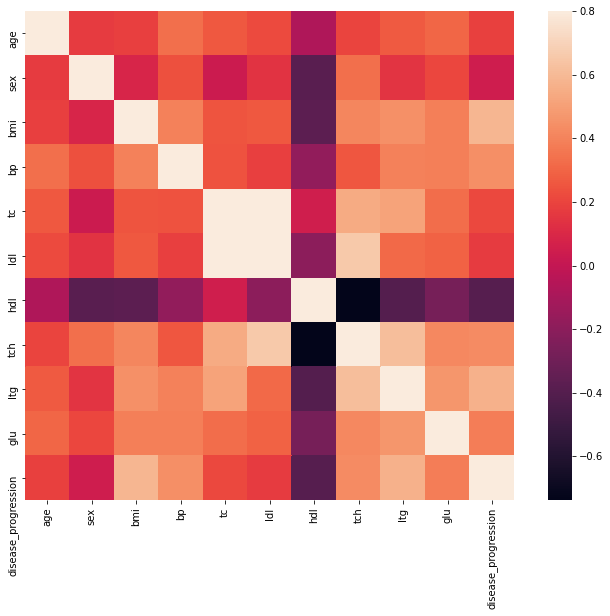

In [97]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Analytics

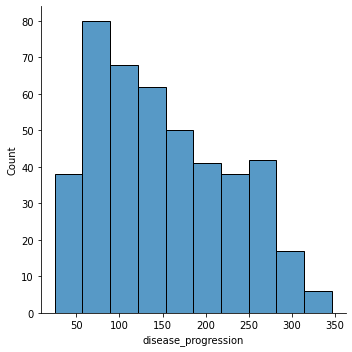

In [98]:
sns.displot(df['disease_progression'])

Define X and y

In [99]:
y = df.disease_progression
X = df.drop(['disease_progression'], axis=1)

In [100]:
X

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [101]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: disease_progression, Length: 442, dtype: float64

Split X

In [102]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((397, 10), (45, 10), (397,), (45,))

Define model

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [104]:
model1 = GradientBoostingRegressor(random_state=1, n_estimators=1000, max_depth=10).fit(X_train, y_train)
print(model1.score(X_train, y_train))

1.0


In [105]:
pred1 = model1.predict(X_val)
pred1

array([101.28541605,  95.61042295,  83.52632823,  71.67856742,
        97.24171061, 279.83852864, 286.45413117,  56.24361101,
       218.20100244, 104.02687071, 201.21764016, 199.18949142,
       101.1537372 ,  88.76926527, 279.06620578, 278.08488792,
       140.78749798,  80.2032293 , 180.76457931, 205.28149966,
        93.62137652, 123.33349679, 118.13864486,  81.50358819,
        98.50770544, 200.37745057, 123.95231225, 195.25944325,
        91.31168752, 243.40002914, 102.40713573, 100.22839554,
       169.06474146,  98.67368486, 147.66596123, 211.08443261,
       144.44145689, 171.03583391, 165.16731415, 173.92692877,
       221.43688601, 179.15267907, 195.80481671, 102.62443991,
       122.48486993])

In [106]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_val, pred1, squared=True)
rms

6382.833736538118

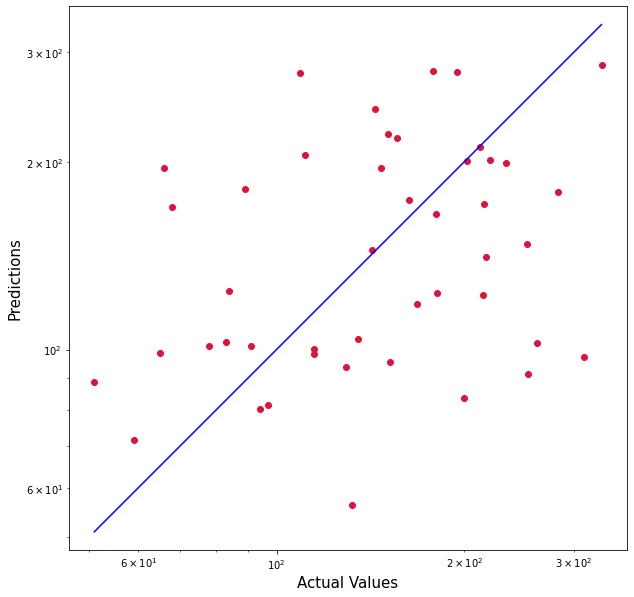

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, pred1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred1), max(y_val))
p2 = min(min(pred1), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

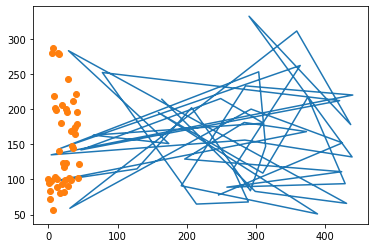

In [108]:
plt.plot(y_val)
plt.plot(pred1, 'o')
plt.show()

In [109]:
model2 = RandomForestRegressor(n_estimators=3000, max_depth=15, random_state=1).fit(X_train, y_train)
print(model2.score(X_train, y_train))

0.9262076256681695


In [110]:
pred2 = model2.predict(X_val)
pred2

array([131.41474167, 100.81751844, 161.71874444,  73.59601057,
       148.79690179, 257.40742178, 232.14133469,  92.9396904 ,
       161.62161162,  97.25595909, 173.24592842, 190.42325   ,
       108.81714497,  82.7793106 , 259.69344415, 210.61406544,
       189.02121768,  90.71464261, 140.90855   , 192.04397353,
       166.70263952,  79.62590238, 106.84594932, 113.55081   ,
        94.19252129, 217.96134721,  88.32413092, 155.77606306,
       116.792608  , 202.9441096 , 131.51574675, 158.52393706,
       190.22584087, 107.13861609, 170.401     , 194.86226855,
       123.32479769, 229.83411719, 145.35493358, 186.14921349,
       185.95884054, 196.0271    , 136.5525766 , 114.4565416 ,
       130.19560457])

In [111]:
rms = mean_squared_error(y_val, pred2, squared=True)
rms

4173.437766060988

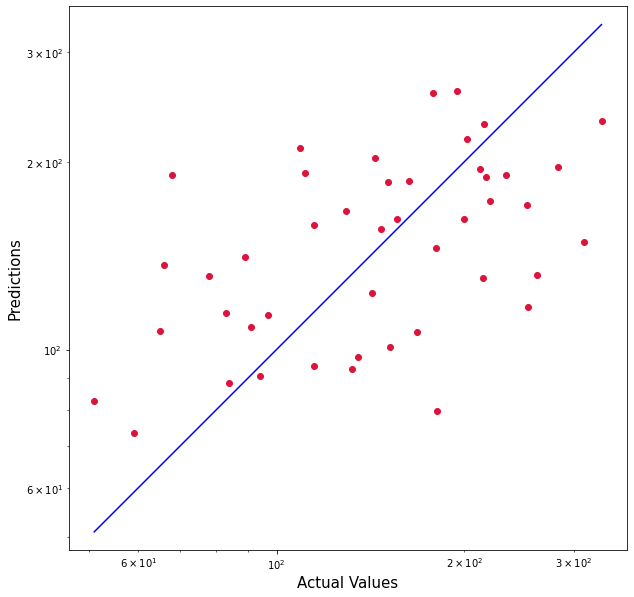

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, pred2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred2), max(y_val))
p2 = min(min(pred2), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

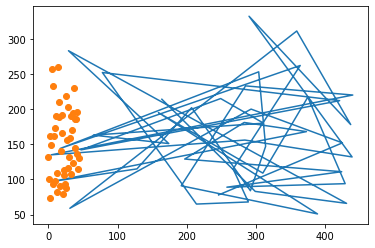

In [113]:
plt.plot(y_val)
plt.plot(pred2, 'o')
plt.show()

In [114]:
model3 = LinearRegression().fit(X_train, y_train)
print(model3.score(X_train, y_train))

0.5344510439633885


In [115]:
pred3 = model3.predict(X_val)
pred3

array([122.41932407, 111.48365055, 184.18558652,  68.52087272,
       171.44221745, 191.06463336, 220.61738089, 117.98679452,
       156.5524466 , 126.49478122, 213.88062061, 199.98328703,
        90.87507124,  79.36223511, 234.96537061, 204.19340103,
       176.94030006, 101.88594035, 111.86181655, 170.60381844,
       185.83614993,  82.11394798, 140.77629148, 106.88120017,
        92.28592319, 212.31820792,  92.21122242, 176.92601402,
       119.67674197, 181.00300506, 156.75743341, 138.82248129,
       197.06334156,  98.33667675, 163.42298972, 190.93523247,
       107.61370587, 246.79405   , 172.97198996, 186.61704933,
       162.58918571, 180.1143173 , 118.5461696 , 121.61931807,
       145.27196886])

In [116]:
rms = mean_squared_error(y_val, pred3, squared=True)
rms

3319.692587139559

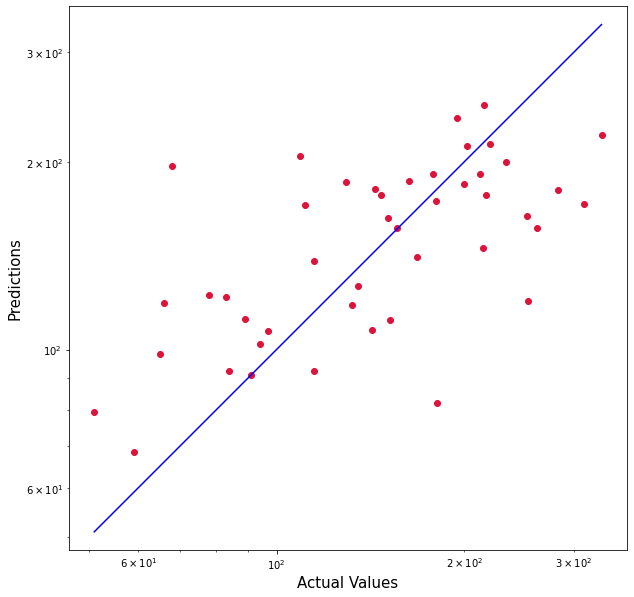

In [117]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, pred3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred3), max(y_val))
p2 = min(min(pred3), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

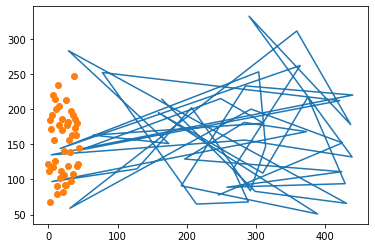

In [118]:
plt.plot(y_val)
plt.plot(pred3, 'o')
plt.show()

In [119]:
model_vote = VotingRegressor([('gb', model1), ('rf', model2), ('lr', model3)]).fit(X_train, y_train)
print(model_vote.score(X_train, y_train))

0.9028386563766272


In [120]:
pred_vote = model_vote.predict(X_val)
pred_vote

array([118.37316059, 102.63719731, 143.14355306,  71.26515024,
       139.16027662, 242.77019459, 246.40428225,  89.05669864,
       178.79168689, 109.25920367, 196.11472973, 196.53200948,
       100.28198447,  83.63693699, 257.90834018, 230.96411813,
       168.91633857,  90.93460409, 144.51164862, 189.30976388,
       148.72005532,  95.02444905, 121.92029522, 100.64519945,
        94.99538331, 210.2190019 , 101.49588853, 175.98717345,
       109.26034583, 209.1157146 , 130.22677196, 132.52493796,
       185.45130796, 101.38299257, 160.49665032, 198.96064454,
       125.12665348, 215.88800037, 161.1647459 , 182.23106387,
       189.99497076, 185.09803213, 150.30118764, 112.90009986,
       132.65081445])

In [121]:
rms = mean_squared_error(y_val, pred_vote, squared=True)
rms

4209.90354103684

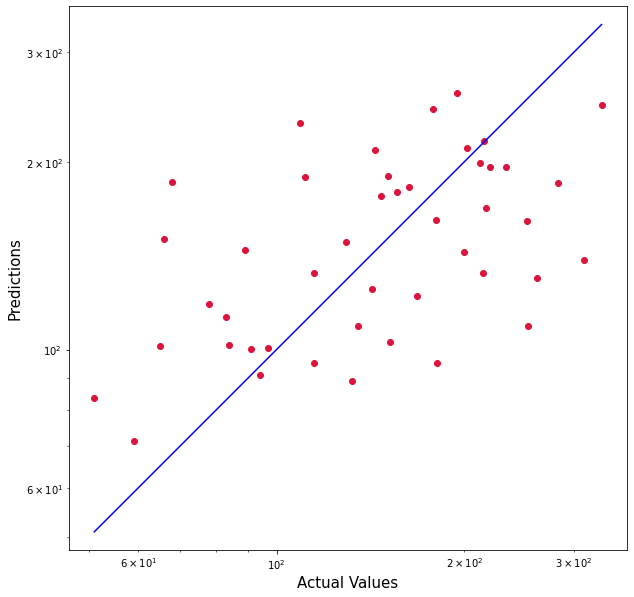

In [122]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, pred_vote, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_vote), max(y_val))
p2 = min(min(pred_vote), min(y_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()